- https://www.kaggle.com/c/data-science-bowl-2018/code?competitionId=8089&sortBy=voteCount
- https://www.youtube.com/watch?v=RaswBvMnFxk&list=PLZsOBAyNTZwbR08R959iCvYT3qzhxvGOE&index=6
- manche Bilder sind farbig, darauf geht Tut nicht ein. 
- Im Tut ist auch kein astype zu float für y gemacht, was eine Fehlermeldung bei der Bildanzeige gibt


In [1]:
import os
import random
import numpy as np
 
from tqdm import tqdm 

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

In [2]:
TRAIN_PATH = r'E:/data/Projects/Semantic Segmentation/Malaria/stage1_train/'
TEST_PATH = r'E:/data/Projects/Semantic Segmentation/Malaria/stage1_test/'

In [3]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

In [4]:
# os.walk gibt Tupel aus Ordnern aus, mit [1] nur das zweite aus dem Tupel, hier name von unterordner
# next gibt nächstes Element von Iterator zurück

train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]


In [5]:
# Pics resize
# macht leeres array und updated es dann mit den infos des bildes

X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

<ipython-input-5-0c0fc64014e8>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)


In [6]:
print('Resizing training images and masks')
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):   
    path = TRAIN_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]  
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img  
    
    # Masken-Array füllen und alle Masken zu einer vereinen
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)
    for mask_file in next(os.walk(path + '/masks/'))[2]:
        mask_ = imread(path + '/masks/' + mask_file)
        mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True), axis=-1)
        mask = np.maximum(mask, mask_)  
            
    Y_train[n] = mask   

  0%|                                                                                          | 0/670 [00:00<?, ?it/s]<ipython-input-6-088d76e3c26b>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)


Resizing training images and masks


100%|████████████████████████████████████████████████████████████████████████████████| 670/670 [07:20<00:00,  1.52it/s]


In [18]:
# ohne das hier hatte ich bei der Bildanzeige eine Fehlermeldung für die bools
Y_train = Y_train.astype('float')

In [7]:
# test images
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
sizes_test = []
print('Resizing test images') 
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = TEST_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img

  9%|███████▋                                                                           | 6/65 [00:00<00:01, 43.19it/s]

Resizing test images


100%|██████████████████████████████████████████████████████████████████████████████████| 65/65 [00:01<00:00, 33.00it/s]


https://stackoverflow.com/questions/34990652/why-do-we-need-np-squeeze/53213643

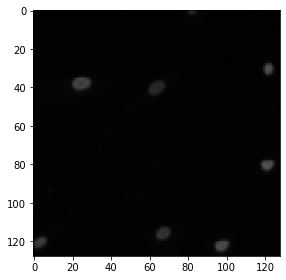

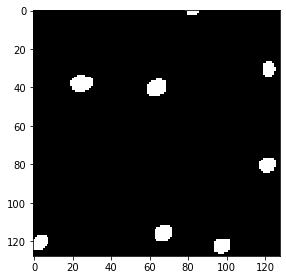

In [19]:
image_x = random.randint(0, len(train_ids))
imshow(X_train[image_x])
plt.show()
imshow(np.squeeze(Y_train[image_x]))
plt.show()

In [20]:
from numpy import asarray
from numpy import save

In [21]:
save('X_train.npy', X_train)
save('X_test.npy', X_test)
save('Y_train.npy', Y_train)